Sales Summary:

    product  total_qty  revenue
0    Eraser         60    300.0
1    Marker         20    300.0
2  Notebook         50   1250.0
3       Pen         90    900.0


<Figure size 800x400 with 0 Axes>

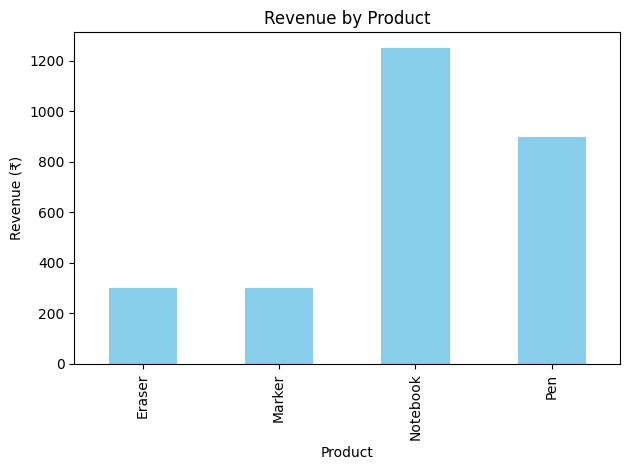

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connecting with SQLLite
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Creating table
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")

# Inserting sample data
sample_data = [
    ('Pen', 50, 10.0),
    ('Notebook', 30, 25.0),
    ('Marker', 20, 15.0),
    ('Pen', 40, 10.0),
    ('Notebook', 20, 25.0),
    ('Eraser', 60, 5.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
conn.commit()

# Query total quantity and revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""
df = pd.read_sql_query(query, conn)

# Display results
print("Sales Summary:\n")
print(df)

# Plotting bar chart for revenue
plt.figure(figsize=(8, 4))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("sales_chart.png")

# Closing DB connection
conn.close()
